In [1]:
# from collections import defaultdict
# from nltk.stem.porter import PorterStemmer
%matplotlib inline 
import operator
import nltk
from textblob import TextBlob
from textblob import Word
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
plt.style.use = 'ggplot'

In [2]:
"""  Cleaning the tweets:
It first removes all the #tags, then make sure the tweets
does not contain http links, non ASCII charaters or that the
first letter of the tweet is @ (to ensure that the tweet is not out of context).
Then it removes any @tagging and any mention of the word sarcasm or sarcastic.
If after this the tweet is not empty and contains at least 3 words, it is added to the list.
Finally, duplicate tweets are removed."""

import numpy as np
import csv
import re

def preprocessing(csv_file_object):
    
    data=[]
    length=[]
    remove_hashtags = re.compile(r'#\w+\s?')
    remove_friendtag = re.compile(r'@\w+\s?')
    remove_sarcasm = re.compile(re.escape('sarcasm'),re.IGNORECASE)
    remove_sarcastic = re.compile(re.escape('sarcastic'),re.IGNORECASE)  

    for row in csv_file_object:
        if len(row[0:])==1:
            temp=row[0:][0]
            temp=remove_hashtags.sub('',temp)
            if len(temp)>0 and 'http' not in temp and temp[0]!='@' and '\u' not in temp: 
                temp=remove_friendtag.sub('',temp)
                temp=remove_sarcasm.sub('',temp)
                temp=remove_sarcastic.sub('',temp)
                temp=' '.join(temp.split()) #remove useless space
                if len(temp.split())>2:
                    data.append(temp)
                    length.append(len(temp.split()))
    data=list(set(data))
    #data = np.array(data)
    
    return data, length

print 'Extracting data'


### POSITIVE DATA ####
csv_file_object_pos = csv.reader(open('positiveTweets.txt', 'rU',),delimiter='\n')
pos_data, length_pos = preprocessing(csv_file_object_pos)


### NEGATIVE DATA ####
csv_file_object_neg = csv.reader(open('negativeTweets.txt', 'rU'),delimiter='\n')
neg_data, length_neg = preprocessing(csv_file_object_neg)

print 'Number of  sarcastic tweets :', len(pos_data)
print 'Average length of sarcastic tweets :', np.round(np.mean(length_pos))
print 'Number of  non-sarcastic tweets :', len(neg_data)
print 'Average length of non-sarcastic tweets :', np.round(np.mean(length_neg))

Extracting data
Number of  sarcastic tweets : 2041
Average length of sarcastic tweets : 13.0
Number of  non-sarcastic tweets : 7587
Average length of non-sarcastic tweets : 12.0


In [3]:
#bye bye emoticons!

def rem_em(L):
    clean = []
    for t in L:
        remove_emojis = [i for i in t if ord(i) < 128]
        remove_emojis = ''.join(remove_emojis)
        clean.append(remove_emojis)
    return clean

In [4]:
dataneg = rem_em(neg_data)

In [5]:
datapos = rem_em(pos_data)

In [6]:
print dataneg[0]
print datapos[0]

I barely know my daddy side of the family 
I wonder if Hull have "ever beaten Liverpool today in any competition" they would've said surely.


In [7]:
print type(dataneg)
print type(datapos)

<type 'list'>
<type 'list'>


In [8]:
sarc = ['sarc'] * len(datapos)

In [9]:
nonsarc = ['nonsarc'] * len(dataneg)

In [10]:
def listoftuple(tweetsdata, category):
    result = zip(tweetsdata, category)
    return result

In [11]:
sarc_cl_data = listoftuple(datapos,sarc)

In [12]:
nonsarc_cl_data = listoftuple(dataneg,nonsarc)

In [13]:
print len(sarc_cl_data)
print len(nonsarc_cl_data)

2041
7587


In [14]:
dataneg[0]

'I barely know my daddy side of the family '

In [15]:
for i in range(len(datapos)):
    sentpolpos = TextBlob(str(datapos[i])).sentiment
    

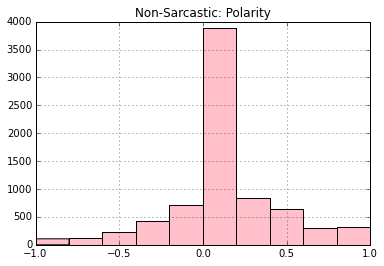

In [16]:
polarlistneg = []
sentlistneg = []
for i in range(len(dataneg)):
    sentpolneg = TextBlob(str(dataneg[i])).sentiment
    polarlistneg.append(sentpolneg[0])
    sentlistneg.append(sentpolneg[1])
#     print polarlist
#     print sentpolneg[0]
plt.hist(polarlistneg, color = 'pink')
plt.title('Non-Sarcastic: Polarity')
plt.grid(True)
plt.show()

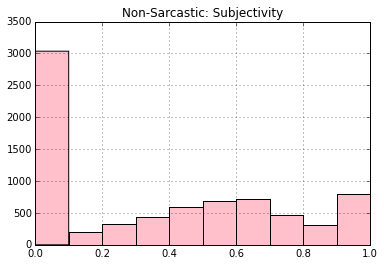

In [17]:
plt.hist(sentlistneg, color = 'pink')
plt.title('Non-Sarcastic: Subjectivity')
plt.grid(True)
plt.show()

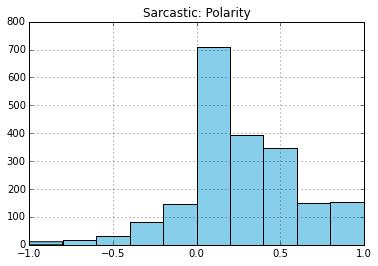

In [18]:
polarlistpos = []
sentlistpos = []
for i in range(len(datapos)):
    sentpolpos = TextBlob(str(datapos[i])).sentiment
    polarlistpos.append(sentpolpos[0])
    sentlistpos.append(sentpolpos[1])

plt.hist(polarlistpos, color = 'skyblue')
plt.title('Sarcastic: Polarity')
plt.grid(True)
plt.show()

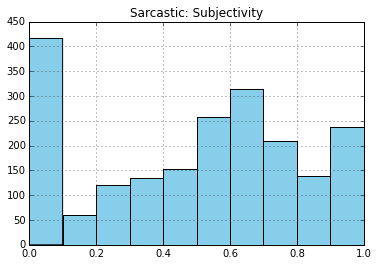

In [19]:
plt.hist(sentlistpos,  color = 'skyblue')
plt.title('Sarcastic: Subjectivity')
plt.grid(True)
plt.show()

In [20]:
print len(sentlistneg)
print len(polarlistneg)
print len(sentlistpos)
print len(polarlistpos)

7587
7587
2041
2041


In [21]:
polarposarray = np.array(polarlistpos)
sentposarray = np.array(sentlistpos)
dataposarray= np.transpose(np.vstack([polarposarray, sentposarray]))
sarccol = np.ones((2041,), int)
# polpossq = np.array(polarlistpos^2)
# np.hstack(dataposarray,polpossq)


polarnegarray = np.array(polarlistneg)
sentnegarray = np.array(sentlistneg)
datanegarray= np.transpose(np.vstack([polarnegarray, sentnegarray]))
nonsarccol = np.zeros((7587,), int)


sarclabel = np.c_[dataposarray, sarccol]
nonsarclabel = np.c_[datanegarray, nonsarccol]
nonsarclabelp = nonsarclabel[:2041,:]

mixed_data = np.vstack([sarclabel, nonsarclabelp])

print sarclabel.shape
print nonsarclabel.shape
print mixed_data.shape

(2041, 3)
(7587, 3)
(4082, 3)


In [22]:
X = mixed_data[:, [0,1]]
y = mixed_data[:, [2]]

print X.shape
print y.shape

(4082, 2)
(4082, 1)


In [23]:
import numpy as np
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0)

In [24]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svcmodel = SVC(kernel='rbf')

In [26]:
evaluate_cross_validation(svcmodel, X_train, y_train, 5)

/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

[ 0.61990212  0.62091503  0.63562092  0.60457516  0.64052288]
Mean score: 0.624 (+/-0.006)


/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [27]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [28]:
train_and_evaluate(svcmodel, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.62724599804
Accuracy on testing set:
0.628795298727
Classification Report:
             precision    recall  f1-score   support

        0.0       0.62      0.61      0.61       495
        1.0       0.64      0.65      0.64       526

avg / total       0.63      0.63      0.63      1021

Confusion Matrix:
[[301 194]
 [185 341]]


/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Confusion matrix, without normalization
[[301 194]
 [185 341]]
Normalized confusion matrix
[[ 0.61  0.39]
 [ 0.35  0.65]]


/Users/oksitosin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


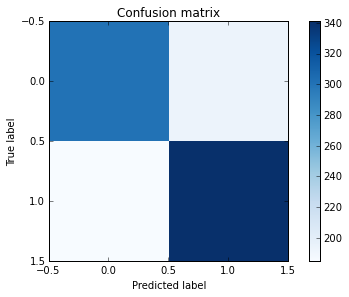

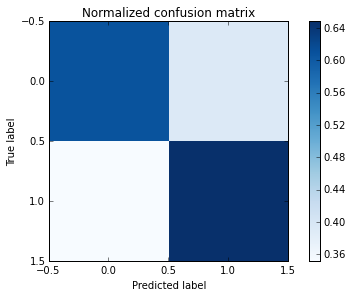

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = svcmodel.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc

def draw_roc_curve(model, X_train, X_test, y_train, y_test):   
    
    try:
        y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]
    except:
        y_score = model.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/oksitosin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


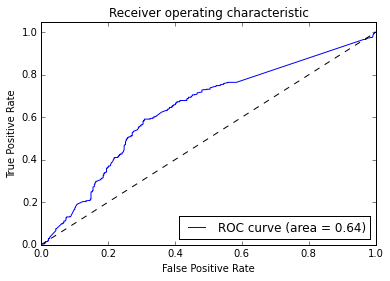

In [32]:
draw_roc_curve(svcmodel, X_train, X_test, y_train, y_test)

In [33]:
def sarcastic(string):
    sntmnt = TextBlob(string).sentiment
    polars = np.array(sntmnt[0])
    sents = np.array(sntmnt[1])
    newpos= np.transpose(np.vstack([polars, sents]))
    return newpos

In [34]:
a = sarcastic("Sarcasm detector, that's a really good invention!")
svcmodel.predict(a)

array([ 1.])

In [35]:
a

array([[ 0.88,  0.6 ]])

In [36]:
nonsar = datanegarray[:2041]
sar = dataposarray

In [ ]:
# fig, axes = plt.subplots(ncols=2, nrows=1)
# ax1, ax2 = axes.ravel()

# ax1.plot(polarlistneg[:2041], polarlistpos, 'bo')
# ax2.plot(sentlistneg[:2041], sentlistpos, 'ro')

plt.scatter(polarlistneg, sentlistneg, polarlistpos, sentlistpos)

plt.legend()
plt.grid(True)
plt.title('Sarcastic & Non-Sarcastic')
plt.show()